In [18]:
import tal
import os

""" TODO this tutorial is WIP """

# TODO: if you want to follow this tutorial,
# you need to have rendered the scene using the "tal render nlos-z.freq" shell command
# See README.md for more information
# Write here        vvvvvvvvvvvvvvv   the path to your rendered scene
root = 'nlos-z-freq/YYYYMMDD-HHMMSS'

data = tal.io.read_capture(os.path.join(root, 'nlos-z-freq.hdf5'))

In [19]:
# because this is a test scene, we know the hidden geometry
# is located at Z = 1
# this volume_xyz is coplanar to the relay wall (rw) at Z=1
volume_xyz = tal.reconstruct.get_volume_project_rw(data, depths=[1.0,])
print(volume_xyz.shape)

(64, 64, 1, 3)


In [20]:
print(data.H.shape)

(231, 64, 64)


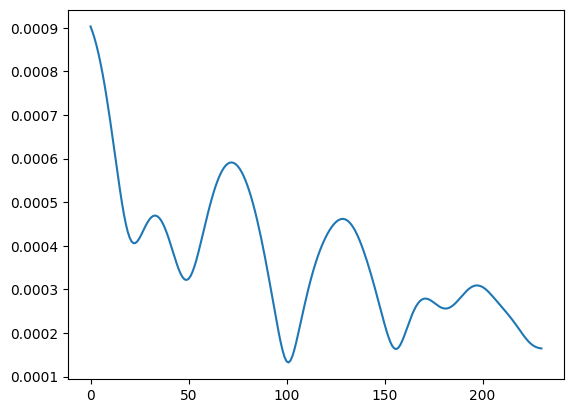

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.abs(data.H[:, 0, 0]))

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for camera convolutions.
114 344
[ 8.304195   8.37704    8.449883   8.522727   8.5955715  8.668415
  8.741259   8.814102   8.886947   8.95979    9.032634   9.105478
  9.178322   9.251165   9.324009   9.396853   9.469697   9.542541
  9.615385   9.688229   9.761072   9.833916   9.90676    9.979604
 10.052447  10.125292  10.198135  10.270979  10.3438225 10.416667
 10.489511  10.562354  10.635199  10.708042  10.780886  10.853729
 10.926574  10.999417  11.072261  11.145105  11.217949  11.290792
 11.363636  11.4364805 11.509324  11.582168  11.655012  11.727856
 11.800699  11.873543  11.946387  12.019231  12.092074  12.164918
 12.237762  12.310606  12.38345   12.456294  12.529138  12.601981
 12.674825  12.747669  12.820513  12.893356  12.966201  13.039044
 13.111888  13.1847315 13.257576  13.33042   13.403263  13.476108
 13.548951  13.621795  13.694638  13.767483  13.840326  13.91317
 13.986014  14.05

tal.reconstruct.pf_dev divide-frequency: 100%|██████████| 231/231 [00:00<00:00, 354.20it/s]


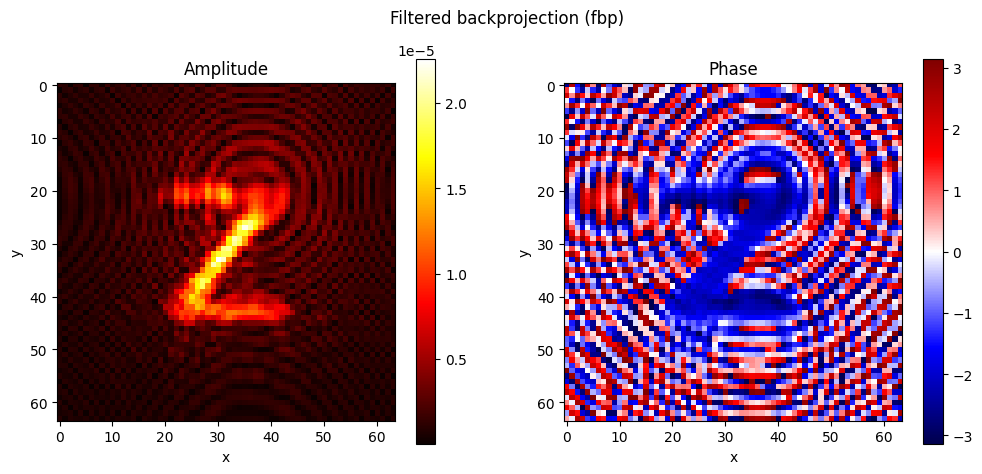

In [22]:
# Here is a reconstruction using filtered backprojection
# By default:
# * The filtering applied, by default, is the phasor field filter with the
#       wl_mean and wl_sigma specified
# * It is single-threaded (see tal.resources to see how to multi-thread)
H_1 = tal.reconstruct.pf_dev.solve(data, wl_mean=0.06, wl_sigma=0.06,
                                volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT,
                                skip_H_fft=True, skip_H_padding=True)
tal.plot.amplitude_phase(H_1, title='Filtered backprojection (fbp)')